## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import cv2
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import mean_squared_error

import pickle
import sys

import os
import pandas as pd
import matplotlib.gridspec as gridspec

import seaborn as sns

from PIL import Image
from skimage.transform import rescale, resize, rotate
from skimage.color import gray2rgb, rgb2gray
from skimage import transform, filters, exposure
from skimage.io import imread

from scipy.ndimage.interpolation import rotate

import platform

%matplotlib inline


In [23]:
class ChessBoardClass(object):

    def __init__(self):
        
        x_cor = 9 #Number of corners to find
        y_cor = 6
        # Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
        self.objp = np.zeros((y_cor*x_cor,3), np.float32)
        self.objp[:,:2] = np.mgrid[0:x_cor, 0:y_cor].T.reshape(-1,2)
        
        self.objpoints = [] # 3d points in real world space
        self.imgpoints = [] # 2d points in image plane.

        self.missing_chess_board = {}
    
    def setImages(self,filenames):
        self.orig_images = list( map( lambda f:cv2.imread(f), filenames ) )
        self.gray_images = list( map( lambda img:cv2.cvtColor(img,cv2.COLOR_RGB2GRAY),self.orig_images ) )

    def checkChessBoard(self, filenames):
        
        self.setImages(filenames)
        plt.figure(figsize=(22,26))
        plt.figtext(0.5,0.9,'ChessBoard Corners Patterns Detection', fontsize=22, ha='center')

        for i, gray_image in enumerate(self.gray_images):

            ret, corners = cv2.findChessboardCorners(gray_image, (9,6),None)
            # If found, add object points, image points
            if ret == True:
                self.objpoints.append(self.objp)
                self.imgpoints.append(corners)
                plt.subplot(7,3,len( self.imgpoints )  )
                plt.title(filenames[i])

                # Draw and display the corners
                image = cv2.drawChessboardCorners(self.orig_images[i], (9,6), corners, ret)
                plt.axis('off')
                plt.imshow(image)
            else:
                self.missing_chess_board[filenames[i]] = self.orig_images[i]
    

        print("-" * 50)
        print("   Successful to draw chessboard. %d images" % len(self.imgpoints) )
        print("-" * 50)
    
    def drawMissingCornerChessBoard(self):

        print("-" * 50)
        print("   Missing chessboard. %d images" % len(self.missing_chess_board.keys()) )
        print("-" * 50)
        
        plt.figure(figsize=(22,10))
        #plt.figtext(0.5,0.9,'Missing ChessBoard Corners', fontsize=22, ha='center')
        
        for i, (k,v) in enumerate( self.missing_chess_board.items() ):
            plt.subplot(1,3, i+1  )
            plt.title(k)

            # Draw and display the corners
            plt.axis('off')
            plt.imshow(v)
                
    def undistort(self):

        print("-" * 50)
        print("   Undistort Missing chessboard. %d images" % len(self.missing_chess_board.keys()) )
        print("-" * 50)
        
        plt.figure(figsize=(22,10))
        
        for i, (k,v) in enumerate( self.missing_chess_board.items() ):
            plt.subplot(1,3, i+1  )
            plt.title(k)
            img_size = (v.shape[1], v.shape[0])
            ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(self.objpoints, self.imgpoints, img_size,None,None)
            undist = cv2.undistort(v, mtx, dist, None, mtx)        

            # Draw and display the corners
            plt.axis('off')
            plt.imshow(undist)
            


In [24]:
# read chess board images 
imagefiles = glob.glob('./camera_cal/calibration*.jpg')
print(imagefiles)

['./camera_cal/calibration5.jpg', './camera_cal/calibration4.jpg', './camera_cal/calibration6.jpg', './camera_cal/calibration7.jpg', './camera_cal/calibration3.jpg', './camera_cal/calibration2.jpg', './camera_cal/calibration1.jpg', './camera_cal/calibration20.jpg', './camera_cal/calibration19.jpg', './camera_cal/calibration18.jpg', './camera_cal/calibration15.jpg', './camera_cal/calibration14.jpg', './camera_cal/calibration16.jpg', './camera_cal/calibration17.jpg', './camera_cal/calibration13.jpg', './camera_cal/calibration12.jpg', './camera_cal/calibration10.jpg', './camera_cal/calibration11.jpg', './camera_cal/calibration9.jpg', './camera_cal/calibration8.jpg']


In [25]:
# review chess board with drawChessboardCorners
chessBoard = ChessBoardClass()


## Find Chess Board Corner ##

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

--------------------------------------------------
   Successful to draw chessboard. 17 images
--------------------------------------------------


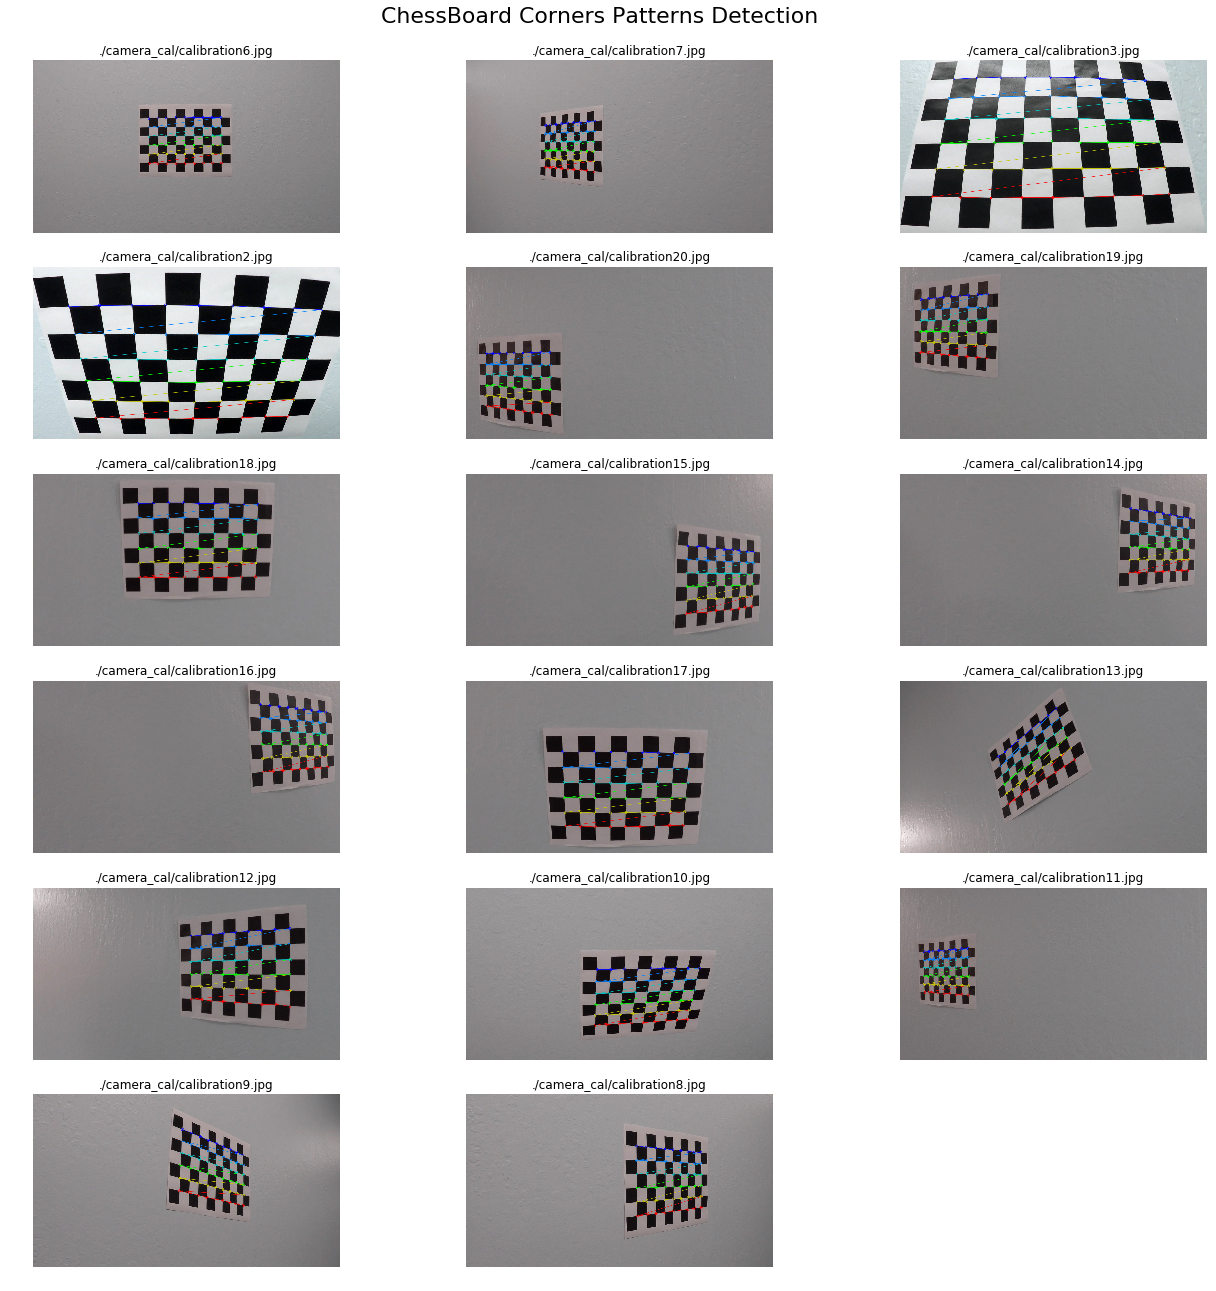

In [26]:
chessBoard.checkChessBoard(imagefiles)

## Missing ChessBoard Corner ##

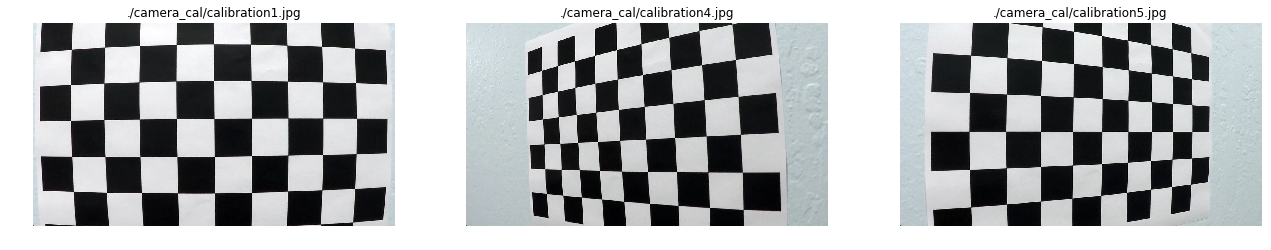

In [17]:
chessBoard.drawMissingCornerChessBoard()

## Undistor image ##
* Apply a distortion correction to raw images.

--------------------------------------------------
   Undistort Missing chessboard. 3 images
--------------------------------------------------


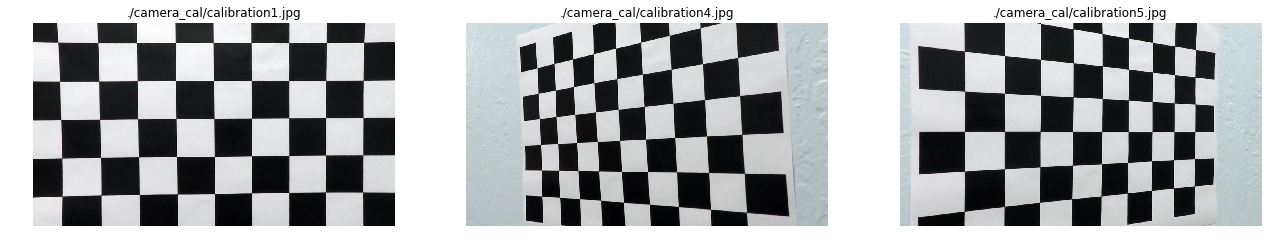

In [27]:
chessBoard.undistort()

## Test Images ##

In [29]:
# read chess board images 
testfiles = sorted(glob.glob('./test_images/test*.jpg'))
print(testfiles)

# 
# read just only one image for displaying and comparing original image with preprocessed image.


['./test_images/test1.jpg', './test_images/test2.jpg', './test_images/test3.jpg', './test_images/test4.jpg', './test_images/test5.jpg', './test_images/test6.jpg']


TypeError: Image data cannot be converted to float

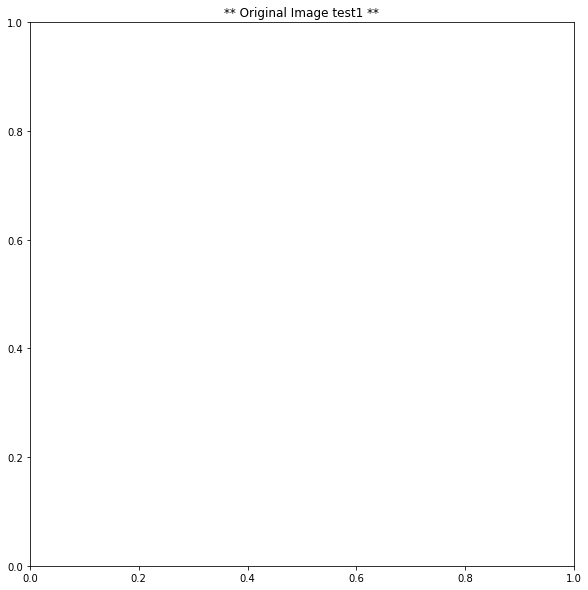

In [30]:



plt.figure(figsize=(22,10))  
plt.subplot(1,2,1  )
plt.title("** Original Image test1 **")
plt.imshow(testfiles[0])
        

In [ ]:
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    # 3) Take the absolute value of the derivative or gradient
    sobel = np.absolute(sobelx)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    sobel = np.uint8( 255 * sobel / np.max(sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    sxbinary = np.zeros_like(sobel)
    sxbinary[(sobel >= thresh_min) & (sobel <= thresh_max)] = 1
    # 6) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return sxbinary
    
# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
# Plot the result

In [ ]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    # 3) Take the absolute value of the derivative or gradient
    # magunitude
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    sobel = np.sqrt( abs_sobelx **2 + abs_sobely ** 2  )
    
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    sobel = np.uint8( 255 * sobel / np.max(sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    sxbinary = np.zeros_like(sobel)
    sxbinary[(sobel >= mag_thresh[0]) & (sobel <= mag_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    
    
    
    # 2) Take the gradient in x and y separately
    # 3) Calculate the magnitude 
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    # 5) Create a binary mask where mag thresholds are met
    # 6) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return sxbinary
    
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))
# Plot the result

In [ ]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the gradient in x and y separately
    # 3) Take the absolute value of the x and y gradients
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    # 5) Create a binary mask where direction thresholds are met
    # 6) Return this mask as your binary_output image
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    # 3) Take the absolute value of the derivative or gradient
    # magunitude
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    sobel = np.arctan2(abs_sobely, abs_sobelx)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    #sobel = np.uint8( 255 * sobel / np.max(sobel))
    #print(sobel)
    # 5) Create a binary mask where mag thresholds are met
    sxybinary = np.zeros_like(sobel)
    sxybinary[(sobel > thresh[0]) & (sobel < thresh[1])] = 1
    
    
    
    
    
    #binary_output = np.copy(img) # Remove this line
    return sxybinary
    
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))